# Toy GraphSage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

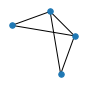

In [172]:
def plot_graph(gdict):
    """Utility: plots a graph from a gdict."""
    G = nx.Graph()
    for node,edges in gdict.items():
        for other in edges:
            G.add_edge(node, other) # Undirected graph, so the order doesn't matter
    nx.draw_kamada_kawai(G, node_size=30)
    return

# Test
plt.figure(figsize=(1,1))
plot_graph({0:[1,2,3], 1:[0,2], 2:[1], 3:[1]})

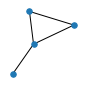

In [45]:
def edges_to_gdict(edges):
    """Utility: transforms a graph from edge-form to dict form."""
    g = {}
    for (i,j) in edges:
        g[i] = g.get(i, []) + [j]
        g[j] = g.get(j, []) + [i]
    return g

plt.figure(figsize=(1,1))
plot_graph(edges_to_gdict([(0,1), (1,2), (0,2), (2,3)]))

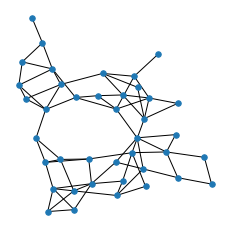

In [167]:
def graph_creator(n=10):
    """Recursive graph creator. The parameter is the number of nodes"""
    def build_edges(s):
        """Splits the set s in 2 parts randomly, calls itself on parts, then links them."""
        if len(s)<2:
            return []
        s1 = [s[0]] + [e for e in s[1:-1] if np.random.uniform()<0.5]
        s2 = [e for e in s if e not in s1]
        if len(s1)>0 and len(s2)>0: # Neither are empty
            cross_edges = [(np.random.choice(s1), np.random.choice(s2)) for i in range(3)]
            # 3 above is a key parameter that defines density, but I don't know the exact relation ;)
        return build_edges(s1) + build_edges(s2) + cross_edges
    
    s = list(range(n))
    edges = build_edges(s)
    return edges_to_gdict(edges)

plt.figure(figsize=(3,3))
plot_graph(graph_creator(40))

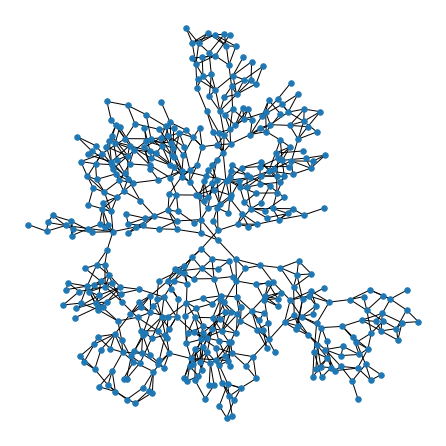

In [171]:
# Another test, with a bigger graph
plt.figure(figsize=(6,6))
plot_graph(graph_creator(500))